<a href="https://colab.research.google.com/github/bmitch26/Retail-Sales-Forecasting/blob/main/Retail_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Brett J. Mitchell

'''
Business Problem:
Understanding customer shopping patterns is crucial for optimizing inventory management and enhancing the
overall shopping experience. However, there is a lack of insights into the key factors influencing sales in
the diverse shopping malls of Istanbul. In this experiment, a data-driven approach is used to uncover patterns,
forecast sales, and identify factors that contribute significantly to the variation in sales across different
customer segments and product categories for the retail landscape of Istanbul.

Target Goal:
The goal of this project is to develop an accurate sales forecasting model for the shopping malls in Istanbul.
By leveraging machine learning techniques and exploring the provided dataset, I aim to predict future sales
based on customer demographics, product categories, and other relevant features. The ultimate objective is to
empower retailers with actionable insights that can guide decision-making, improve inventory management, and
enhance the overall shopping experience for customers.

Hypothesis:
1. Demographic Influence: I hypothesize that there is a correlation between customer demographics (such as age
and gender) and their shopping behavior. For example, certain age groups or gender categories may exhibit
distinct preferences for specific product categories, influencing overall sales.

2. Payment Method Influence: I hypothesize that the choice of payment method (cash, credit card, or debit card)
could impact the amount spent by customers. For example, customers using credit cards might make larger
purchases compared to those using cash.

3. Shopping Mall Variation: I hypothesize that different shopping malls may experience varying sales patterns
due to factors such as location, size, and the demographic profile of their customer base.
'''

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('customer_shopping_data.csv')

# Display basic information about the dataset
print(df.info())
print('\n')

# Display the first few rows of the dataset
print(df.head())
print('\n')

# Summary statistics for numerical variables
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3 

In [79]:
# Explore unique values in categorical variables
print("Unique genders:", df['gender'].unique())
print("Unique payment methods:", df['payment_method'].unique())
print("Unique shopping malls:", df['shopping_mall'].unique())

Unique genders: ['Female' 'Male']
Unique payment methods: ['Credit Card' 'Debit Card' 'Cash']
Unique shopping malls: ['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


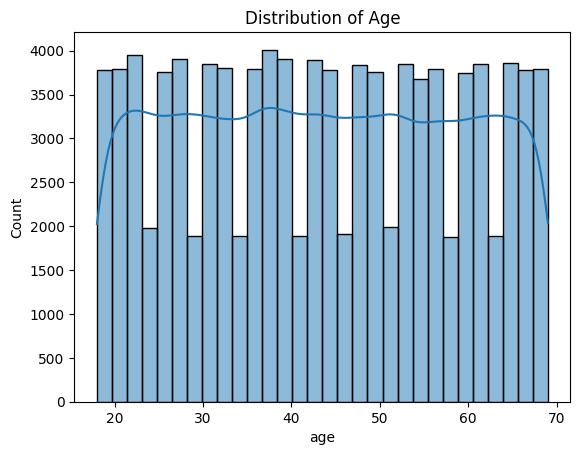

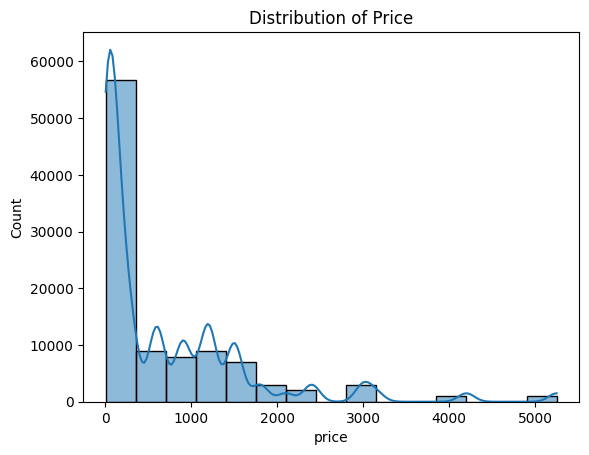

In [80]:
# Visualize the distribution of numerical variables
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df['price'], bins=15, kde=True)
plt.title('Distribution of Price')
plt.show()

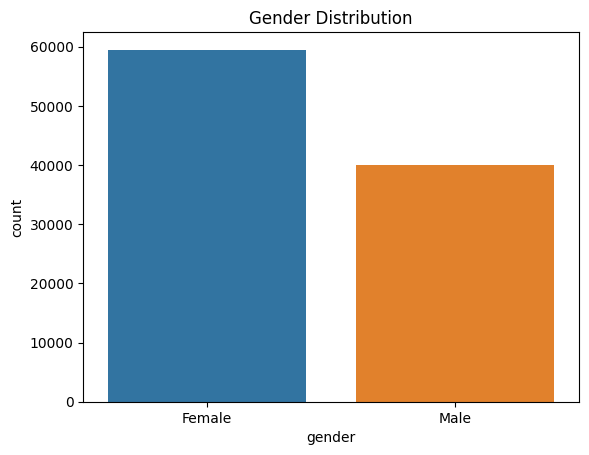

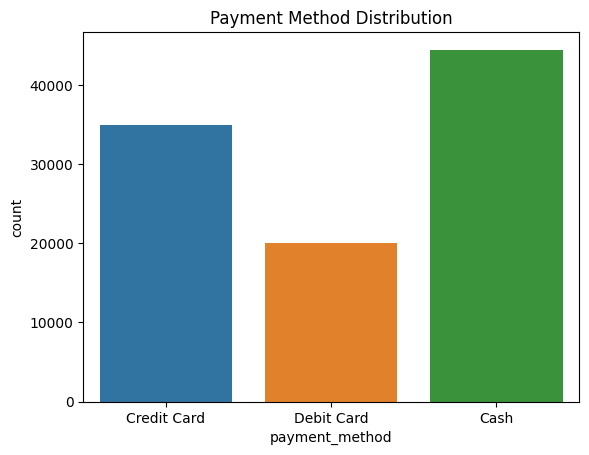

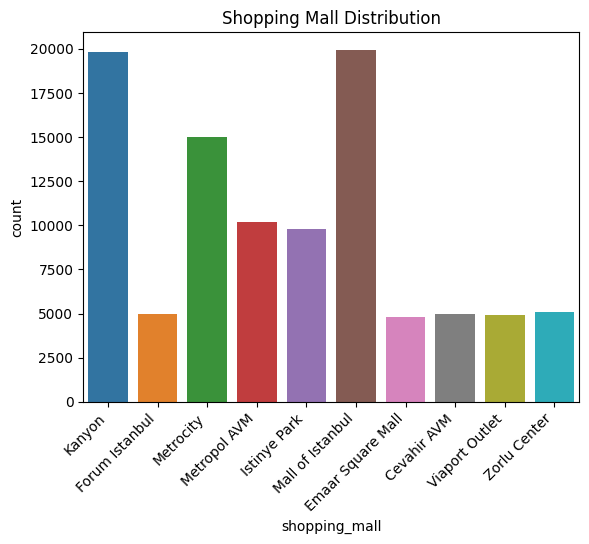

In [81]:
# Visualize categorical variables
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='payment_method', data=df)
plt.title('Payment Method Distribution')
plt.show()

sns.countplot(x='shopping_mall', data=df)
plt.title('Shopping Mall Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

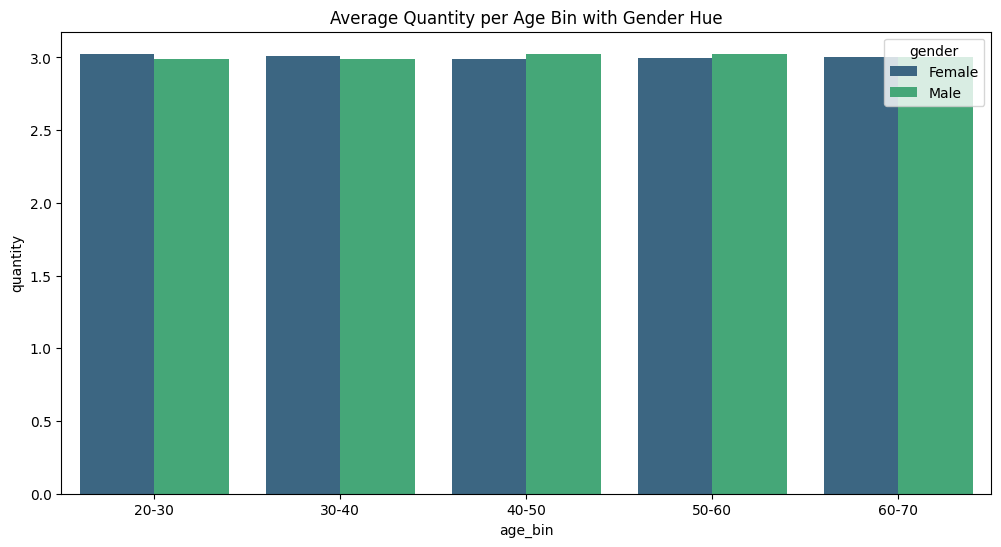

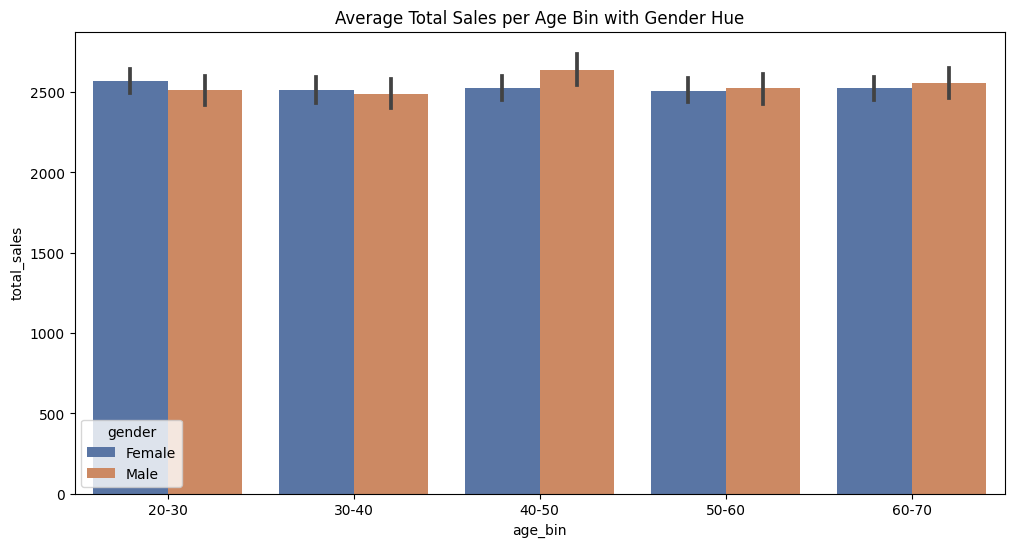

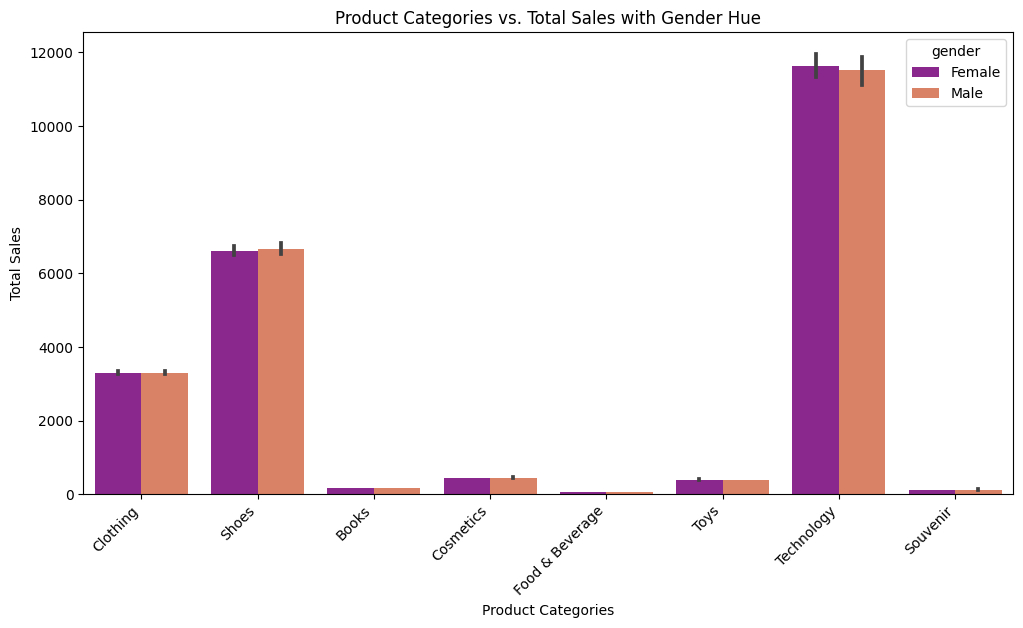

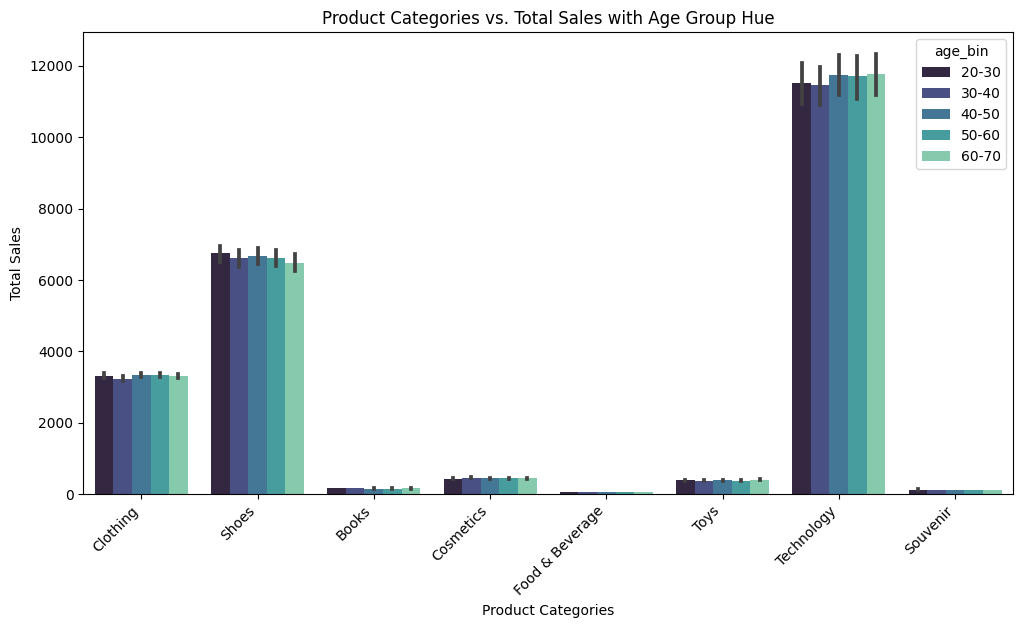

In [82]:
# Test Hypothesis 1

# Bin the ages
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create total sales column
df['total_sales'] = df['quantity'] * df['price']

# Calculate the average quantity per age bin
average_quantity = df.groupby(['age_bin', 'gender'], as_index=False)['quantity'].mean()

# Bar plot for average quantity per age bin with hue for gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_bin', y='quantity', hue='gender', data=average_quantity, palette='viridis')
plt.title('Average Quantity per Age Bin with Gender Hue')
plt.show()

# Calculate the average price per age bin
average_price = df.groupby(['age_bin', 'gender'], as_index=False)['price'].mean()

# Bar plot for average total sales per age bin with hue for gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_bin', y='total_sales', hue='gender', data=df, palette='deep')
plt.title('Average Total Sales per Age Bin with Gender Hue')
plt.show()

# Create a grouped bar plot for product categories, with hue for gender
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_sales', hue='gender', data=df, palette='plasma')
plt.title('Product Categories vs. Total Sales with Gender Hue')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Create a grouped bar plot for product categories, with hue for age group
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_sales', hue='age_bin', data=df, palette='mako')
plt.title('Product Categories vs. Total Sales with Age Group Hue')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

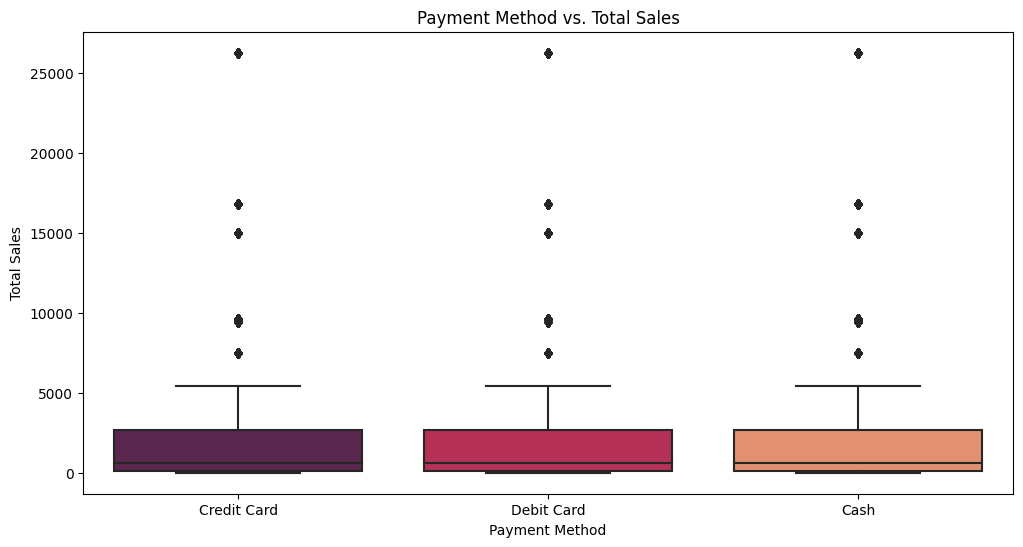

In [83]:
# Testing Hypothesis #2

# Box plot for payment method vs. total sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_method', y='total_sales', data=df, palette='rocket')
plt.title('Payment Method vs. Total Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

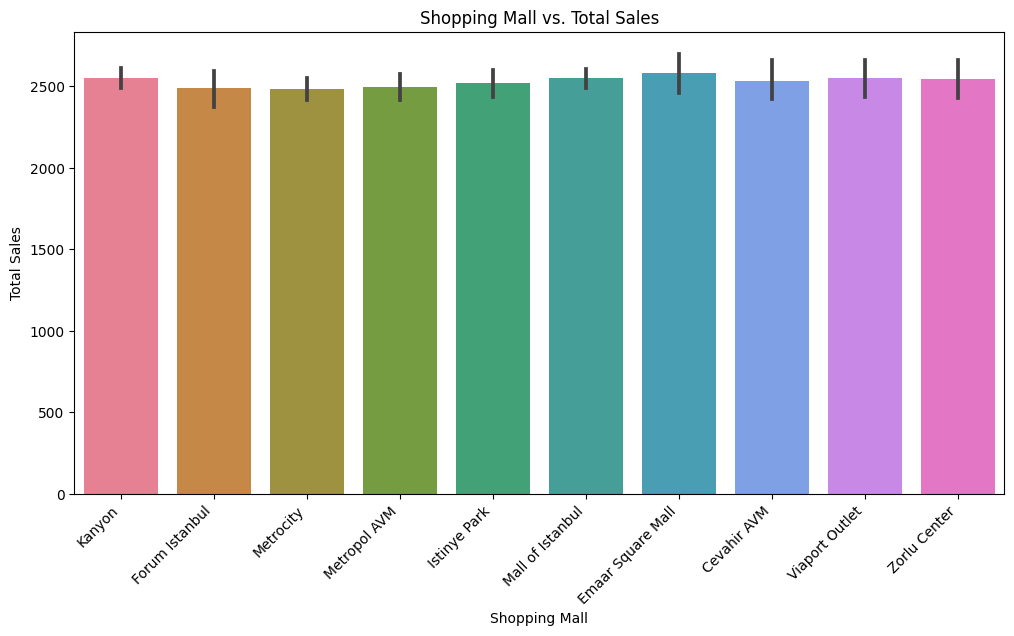

In [84]:
# Testing Hypothesis #3

# Create a grouped bar plot for shopping malls vs. total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='shopping_mall', y='total_sales', data=df, palette='husl')
plt.title('Shopping Mall vs. Total Sales')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-85-eb68e8cfd32d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                  age  quantity     price  total_sales
age          1.000000  0.000667  0.001694     0.002731
quantity     0.000667  1.000000  0.344880     0.461173
price        0.001694  0.344880  1.000000     0.962372
total_sales  0.002731  0.461173  0.962372     1.000000


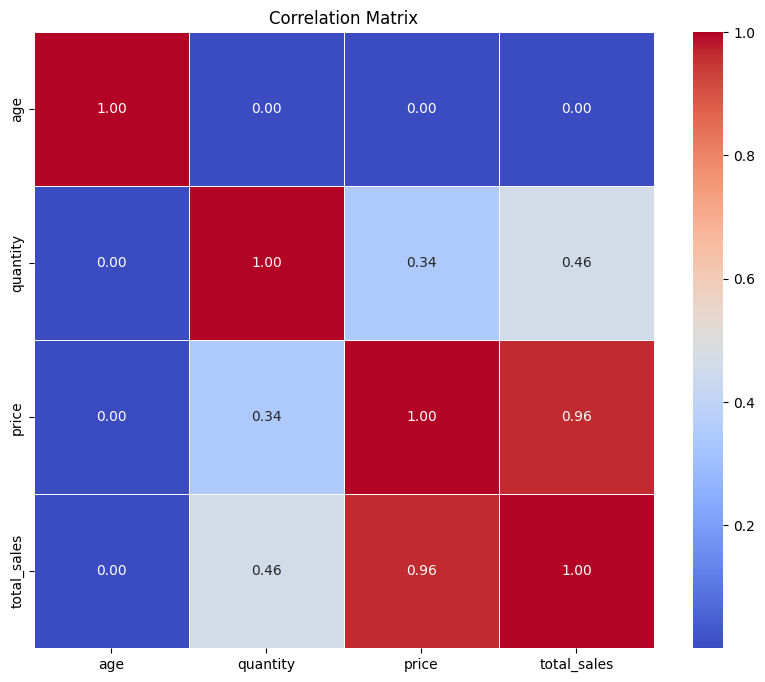

In [85]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [86]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop any rows with missing values for simplicity
df = df.dropna()

# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract features from 'invoice_date' (e.g., day, month, year)
df['day'] = df['invoice_date'].dt.day
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['category'] = label_encoder.fit_transform(df['category'])
df['payment_method'] = label_encoder.fit_transform(df['payment_method'])
df['shopping_mall'] = label_encoder.fit_transform(df['shopping_mall'])

# Define features and target variable
features = ['day', 'month', 'year', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'shopping_mall']
X = df[features]
y = df['total_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

<ipython-input-86-b0f4232f63ba>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


Mean Squared Error: 5.856091440551084e-22


In [87]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print(f'R2 Score: {r2}')

# Display feature importances
feature_importances = rf_model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

print(f'Mean Squared Error: {mse}')


R2 Score: 1.0
day: 1.522813033155696e-15
month: 1.4231543746597742e-15
year: 8.68647756544636e-16
gender: 8.585057526103305e-16
age: 1.6666701835347683e-15
category: 0.0030975070514296064
quantity: 0.0458256707367283
price: 0.9510768222118327
payment_method: 1.4003717833204143e-15
shopping_mall: 1.6162519646537978e-15
Mean Squared Error: 5.856091440551084e-22


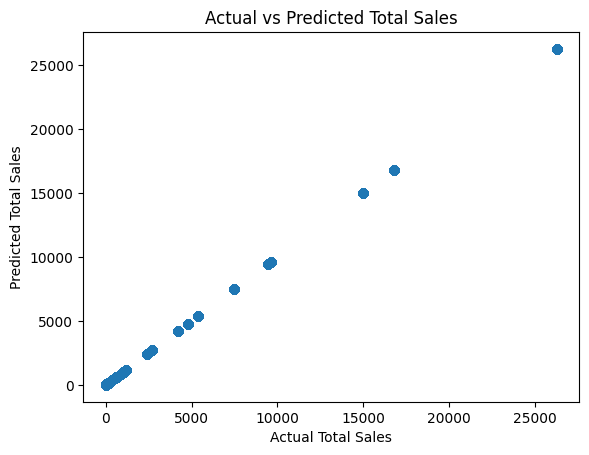

In [88]:
# Scatter plot of actual vs predicted total sales
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Total Sales')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()


In [13]:
# Using Optimized Grid for Fine-Tuning of Random Forest Model

from sklearn.model_selection import GridSearchCV

# Define the optimized parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_predictions = best_rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error
best_mse = mean_squared_error(y_test, best_predictions)
print(f'Best Model Mean Squared Error: {best_mse}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Mean Squared Error: 5.5938934441790725e-22


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Best Hyperparameters
best_hyperparameters = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

# Create a new Random Forest model with the best hyperparameters
new_rf_model = RandomForestRegressor(
    max_depth=best_hyperparameters['max_depth'],
    min_samples_leaf=best_hyperparameters['min_samples_leaf'],
    min_samples_split=best_hyperparameters['min_samples_split'],
    n_estimators=best_hyperparameters['n_estimators'],
    random_state=42
)

# Fit the model to the training data
new_rf_model.fit(X_train, y_train)

# Make predictions on the test set
new_predictions = new_rf_model.predict(X_test)


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
new_predictions = new_rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, new_predictions)
print("Mean Squared Error:", mse)

# Calculate R2 Score
r2 = r2_score(y_test, new_predictions)
print("R2 Score:", r2)


Mean Squared Error: 5.773396615602526e-22
R2 Score: 1.0


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Define new hyperparameters
new_hyperparameters = {
    'max_depth': 5,
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 20
}

# Create a new Random Forest model with the new hyperparameters
fine_tuned_rf_model = RandomForestRegressor(
    max_depth=new_hyperparameters['max_depth'],
    min_samples_leaf=new_hyperparameters['min_samples_leaf'],
    min_samples_split=new_hyperparameters['min_samples_split'],
    n_estimators=new_hyperparameters['n_estimators'],
    max_features='log2',
    random_state=42
)

# Fit the model to the training data
fine_tuned_rf_model.fit(X_train, y_train)

# Make predictions on the test set
fine_tuned_predictions = fine_tuned_rf_model.predict(X_test)

# Calculate Mean Squared Error
mse_fine_tuned = mean_squared_error(y_test, fine_tuned_predictions)
print("Mean Squared Error (Fine-Tuned):", mse_fine_tuned)

# Calculate R2 Score
r2_fine_tuned = r2_score(y_test, fine_tuned_predictions)
print("R2 Score (Fine-Tuned):", r2_fine_tuned)


Mean Squared Error (Fine-Tuned): 1275830.5025695297
R2 Score (Fine-Tuned): 0.9303439844938715


Overall Total Sales: 251505794.25000003
MSE as a Percentage of Total Sales: 0.5072765833505245 %
Feature Importances:
          Feature  Importance
7           price    0.615865
5        category    0.207359
6        quantity    0.175476
0             day    0.000394
4             age    0.000346
1           month    0.000231
9   shopping_mall    0.000217
2            year    0.000051
3          gender    0.000032
8  payment_method    0.000029


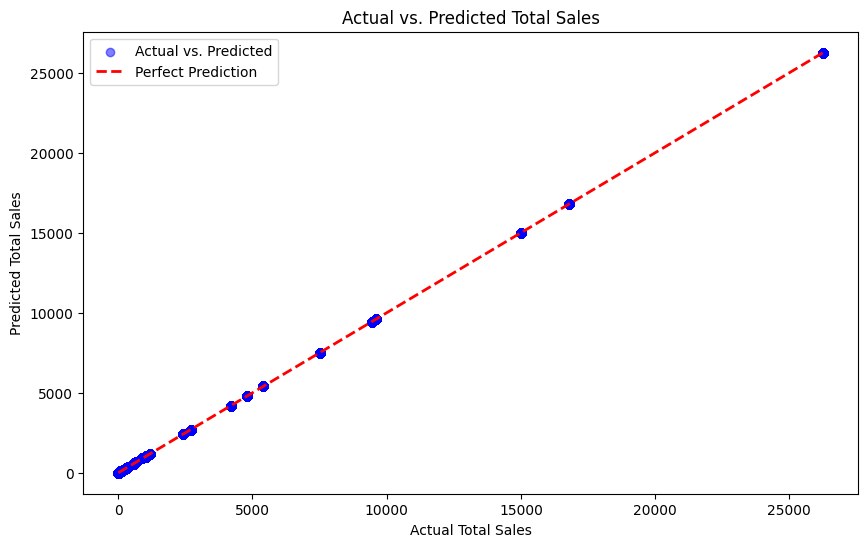

In [70]:
total_sales_overall = df['total_sales'].sum()
print("Overall Total Sales:", total_sales_overall)

mse_percentage = (1275830 / 251505794.25000003) * 100
print("MSE as a Percentage of Total Sales:", mse_percentage, "%")

importances = fine_tuned_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Scatterplot for actual vs. predicted total sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predictions, alpha=0.5, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Total Sales')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.legend()
plt.show()


In [ ]:
'''
Conclusion:

The exploration of the retail landscape in Istanbul revealed unexpected findings, challenging the initial hypotheses.
Despite the initial expectations, the identified patterns provide valuable insights into the complex dynamics of
customer behavior in the diverse shopping malls of Istanbul.

Hypothesis #1:
Demographic Influence:
Contrary to the hypothesis, the analysis did not reveal a significant correlation between customer demographics
(age and gender) and shopping behavior. The intricate and multifaceted nature of customer preferences suggests
that factors beyond basic demographics may play a more substantial role in influencing purchasing decisions.

Hypothesis #2:
Payment Method Influence:
The hypothesis linking payment methods to customer spending was also not supported by the data. The chosen payment
method, whether cash, credit card, or debit card, did not emerge as a dominant factor influencing the amount spent
by customers.

Hypothesis #3:
Shopping Mall Variation:
The hypothesis regarding different shopping malls experiencing varying sales patterns found partial support. While the
data did indicate some variations, factors such as location, size, and customer demographics alone did not fully
explain the observed differences.

Overall Insights:
Despite the initial hypotheses not aligning with the findings, the developed sales forecasting model, with its low Mean
Squared Error (MSE) and high R2 Score, proves its effectiveness in predicting total sales for the shopping malls in
Istanbul. This accuracy suggests that the model captures complex relationships within the data that go beyond the scope
of the initial hypotheses.

Moving forward, it is essential to delve deeper into the nuanced aspects of customer behavior, considering factors beyond
basic demographics and payment methods. Conducting further qualitative research, gathering additional data points, and
exploring external influences could uncover hidden patterns and contribute to a more comprehensive understanding of the
retail landscape in Istanbul. The accurate sales forecasting model may be a valuable tool for retailers, offering
actionable insights for inventory management and decision-making, despite the initial hypotheses not fully aligning with
the observed patterns.
'''